In [2]:
# Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats

In [3]:
from google.colab import files


uploaded = files.upload()

Saving benin-malanville.csv to benin-malanville.csv


In [4]:
# upload the data

df=pd.read_csv("benin-malanville.csv")

1. Summary Statistics & Missing-Value Report

In [108]:
# Describe the numerical columns
print(df.describe())
print("----------------------------------------")
# Find null values
print(df.isna().sum())

# Check the data types
df.info()
# Change Date to date
df["date"]=pd.to_datetime(df["Timestamp"])


                 GHI            DNI            DHI           ModA  \
count  525600.000000  525600.000000  525600.000000  525600.000000   
mean      240.559452     167.187516     115.358961     236.589496   
std       331.131327     261.710501     158.691074     326.894859   
min       -12.900000      -7.800000     -12.600000       0.000000   
25%        -2.000000      -0.500000      -2.100000       0.000000   
50%         1.800000      -0.100000       1.600000       4.500000   
75%       483.400000     314.200000     216.300000     463.700000   
max      1413.000000     952.300000     759.200000    1342.300000   

                ModB           Tamb             RH             WS  \
count  525600.000000  525600.000000  525600.000000  525600.000000   
mean      228.883576      28.179683      54.487969       2.121113   
std       316.536515       5.924297      28.073069       1.603466   
min         0.000000      11.000000       2.100000       0.000000   
25%         0.000000      24.2000

In [54]:
#Find which columns have high null counts
def high_null_columns(df):
  null_count=df.isnull().sum()
  high_null_count=null_count[null_count/len(df)>0.05]
  return high_null_count
print("The columns with high null counts are:")
print(high_null_columns(df))
#Drop columns


The columns with high null counts are:
Comments    525600
dtype: int64


2. Outlier Detection & Basic Cleaning

In [55]:
#Compute Z-score
columns=["GHI", "DNI", "DHI", "ModA", "ModB", "WS", "WSgust"]
zscores=np.abs(stats.zscore(df[columns]))
outliers=(zscores>3).any(axis=1)
print(f"Flagged samples = {outliers.sum(axis=0)}")

#Decide to drop or impute
Percentange_outliers=outliers.sum(axis=0)*100/len(df)
print(f"{Percentange_outliers} %")

Flagged samples = 7740
1.4726027397260273 %


4. Time Series Analysis

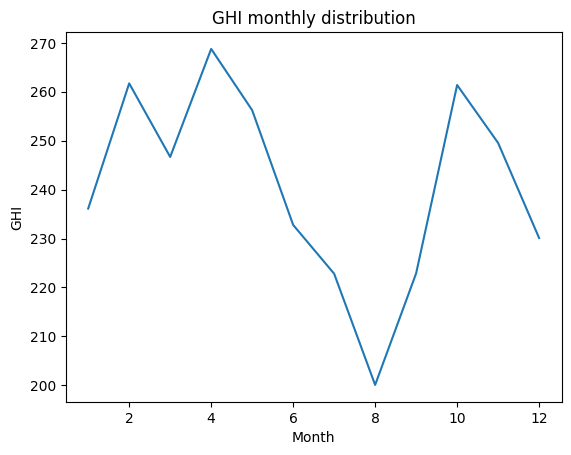

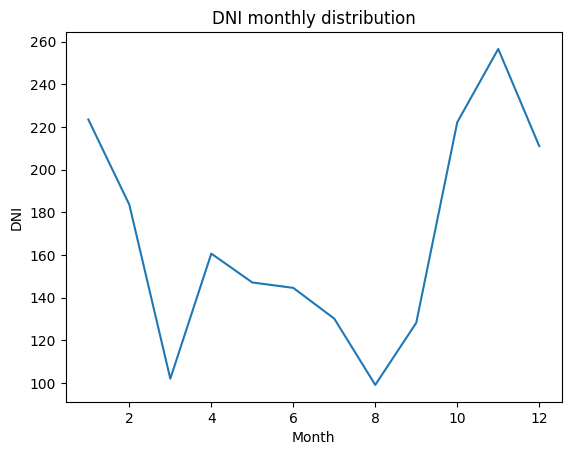

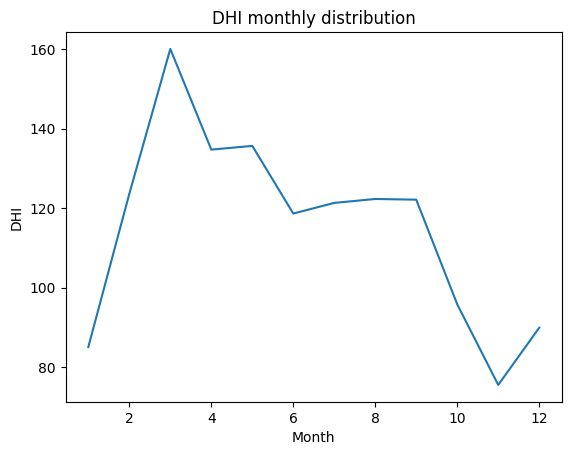

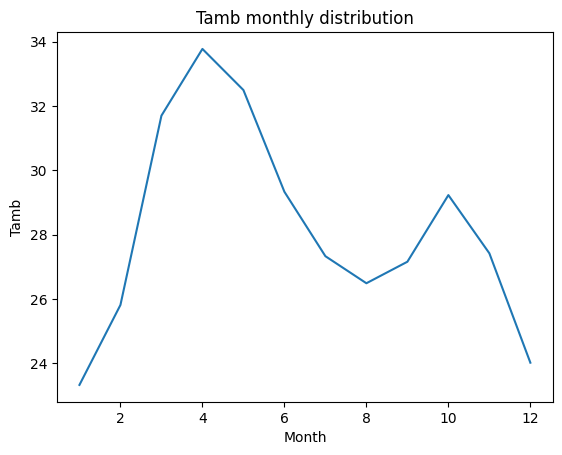

In [56]:
#Prepare key columns for time series analysis
key_columns=["GHI", "DNI", "DHI", "Tamb"]
df["month"]=df["date"].dt.month
#Group by Month
y1=df.groupby('month')[key_columns].mean()
x1=pd.DataFrame([1,2,3,4,5,6,7,8,9,10,11,12])
#Time Series Graphs for Each Month
for col in key_columns:
 plt.plot(x1,y1[col])
 plt.title(f"{col} monthly distribution")
 plt.xlabel("Month")
 plt.ylabel(col)
 plt.show()

In [126]:
#Prepare key columns for time series analysis
df2=df.copy()
df2["day"]=df2["date"].dt.date
df2.set_index('day',inplace=True)
y2=df2.loc['2021-08-09']
df2.head()
#y2
#dates = pd.to_datetime(pd.date_range(start='12/26/2021', end='12/27/2021',freq='min'))
#print(pd.date_range(start='12/26/2021', end='12/27/2021',freq='min'))
#print(df.loc[pd.date_range(start='12/26/2021', end='12/27/2021',freq='min')])
#Time Series Graphs for a day


KeyError: '2021-08-09'

5. Correlation & Relationship Analysis

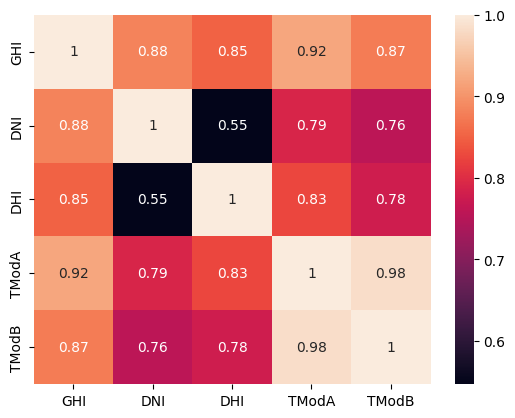

In [131]:
cols=["GHI", "DNI", "DHI", "TModA", "TModB"]
corr=df[cols].corr()
sns.heatmap(corr,annot=True)
plt.show()

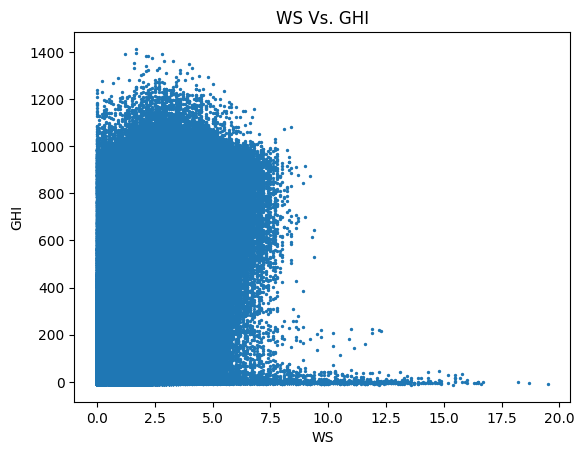

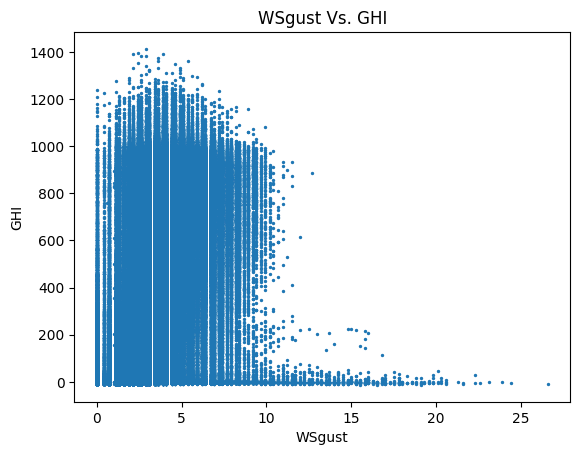

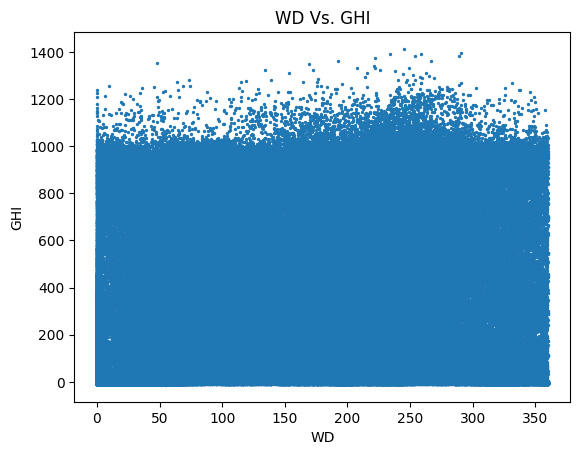

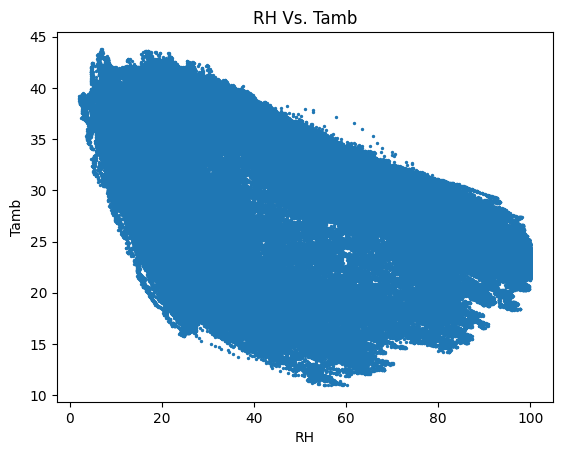

In [10]:
plt.scatter(df["WS"],df["GHI"],s=2)
plt.title('WS Vs. GHI')
plt.xlabel("WS")
plt.ylabel("GHI")
plt.show()
plt.scatter(df["WSgust"],df["GHI"],s=2)
plt.title('WSgust Vs. GHI')
plt.xlabel("WSgust")
plt.ylabel("GHI")
plt.show()

plt.scatter(df["WD"],df["GHI"],s=2)
plt.title('WD Vs. GHI')
plt.xlabel("WD")
plt.ylabel("GHI")
plt.show()

plt.scatter(df["RH"],df["Tamb"],s=2)
plt.title('RH Vs. Tamb')
plt.xlabel("RH")
plt.ylabel("Tamb")
plt.show()


Wind & Distribution Analysis

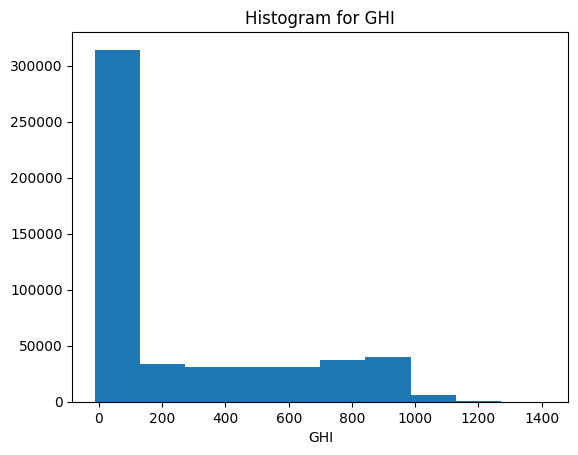

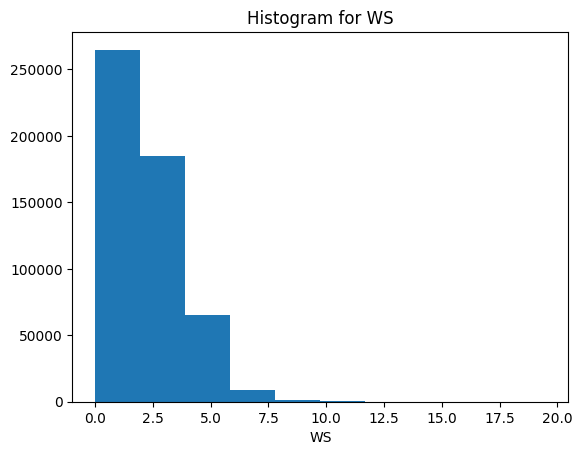

In [12]:
plt.hist(df["GHI"])
plt.title('Histogram for GHI')
plt.xlabel("GHI")
plt.show()

plt.hist(df["WS"])
plt.title('Histogram for WS')
plt.xlabel("WS")
plt.show()

Temperature Analysis

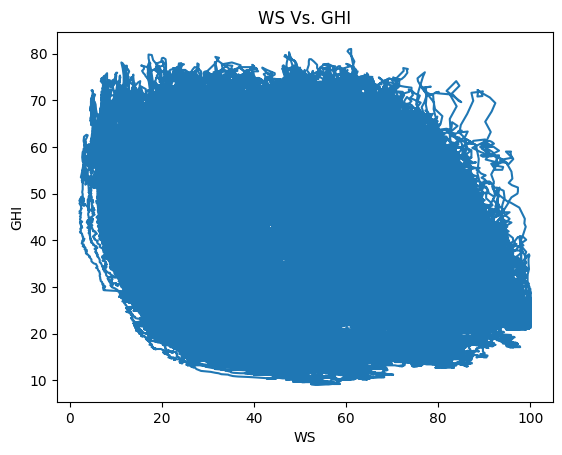

In [14]:
plt.plot(df["RH"],df["TModA"])
plt.title('WS Vs. GHI')
plt.xlabel("WS")
plt.ylabel("GHI")
plt.show()